<a href="https://colab.research.google.com/github/neeshanth/EDA-TH-DA-1/blob/main/Mod2_Multiple_Imputation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Initial Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  615 non-null    int64  
 1   Category    615 non-null    object 
 2   Age         615 non-null    int64  
 3   Sex         615 non-null    object 
 4   ALB         614 non-null    float64
 5   ALP         597 non-null    float64
 6   ALT         614 non-null    float64
 7   AST         615 non-null    float64
 8   BIL         615 non-null    float64
 9   CHE         615 non-null    float64
 10  CHOL        605 non-null    float64
 11  CREA        615 non-null    float64
 12  GGT         615 non-null    float64
 13  PROT        614 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 67.4+ KB
None

Missing Values Count:
Unnamed: 0     0
Category       0
Age            0
Sex            0
ALB            1
ALP           18
ALT            1

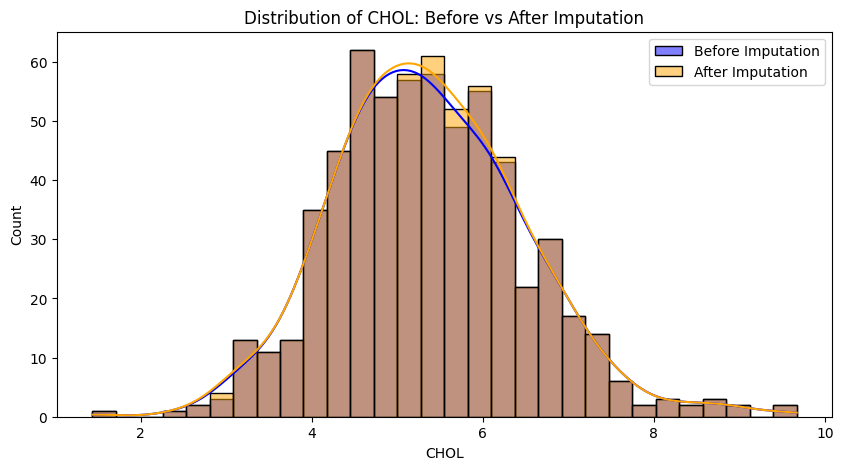

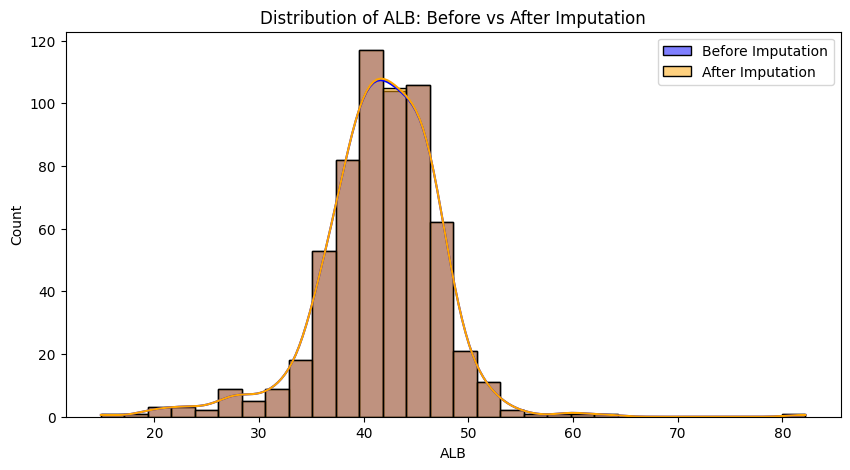

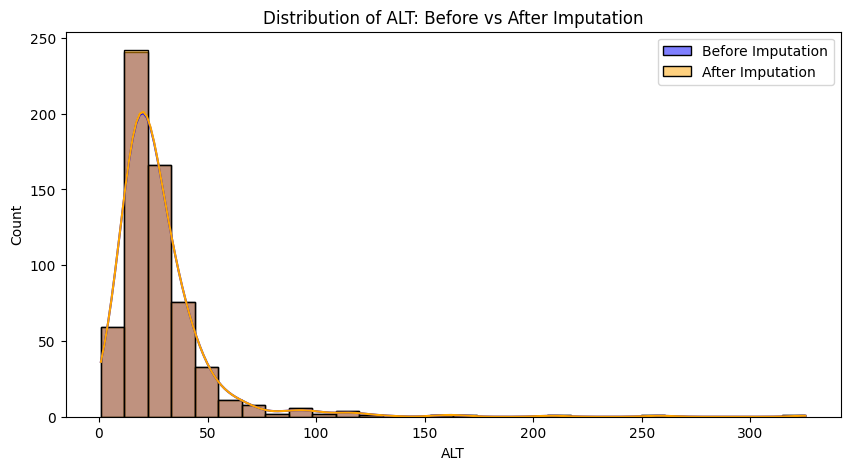

In [2]:
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer  # Enable the MICE implementation
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "/content/HepatitisCdata.csv"
data = pd.read_csv(file_path)

# initial data info
print("Initial Dataset Information:")
print(data.info())
print("\nMissing Values Count:")
print(data.isnull().sum())

# Replacing 0 values in specific columns with NaN (assuming 0 means missing data for specific attributes)
columns_with_zeros = ['CHOL', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CREA', 'GGT', 'PROT']
data[columns_with_zeros] = data[columns_with_zeros].replace(0, np.nan)


# summary before imputation
print("\nMissing Values After Replacement:")
print(data.isnull().sum())

numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
data_num = data[numerical_columns]

# Initializing IterativeImputer (MICE)
mice_imputer = IterativeImputer(max_iter=10, random_state=42)

# imputation
data_imputed = mice_imputer.fit_transform(data_num)

# Converting back to DataFrame
data_imputed_df = pd.DataFrame(data_imputed, columns=numerical_columns)

# summary after imputation
print("\nDataset Information After MICE Imputation:")
print(data_imputed_df.info())
print("\nSummary Statistics of Imputed Data:")
print(data_imputed_df.describe())

# Visualizing distributions before and after imputation (for a few selected columns)
for col in ['CHOL', 'ALB', 'ALT']:
    plt.figure(figsize=(10, 5))
    sns.histplot(data_num[col], kde=True, color='blue', label='Before Imputation', bins=30)
    sns.histplot(data_imputed_df[col], kde=True, color='orange', label='After Imputation', bins=30)
    plt.title(f"Distribution of {col}: Before vs After Imputation")
    plt.legend()
    plt.show()